In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

CREATE A WRANGLE FUNCTION

In [2]:
def wrangle(filepath):
    #import the dataset
    df = pd.read_csv(filepath)
    
    #remove outliers for Bp
    low,high = df["RestingBP"].quantile([0.1,0.9])
    mask_BP = df["RestingBP"].between(low,high)
    
    #remove outlier in cholesterol level
    lower,higher = df["Cholesterol"].quantile([0.195,0.9])
    mask_chol = df["Cholesterol"].between(lower,higher)
    
    #apply the masks
    df=df[mask_BP & mask_chol]
    #return the dataframe
    return df

In [3]:
#use the wrangle function to call the dataset
df = wrangle(r"C:\Users\IFB19-039\Desktop\machine learning\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,52.662139,132.035654,230.541596,0.156197,140.879457,0.870798,0.465195
std,9.413206,13.345376,39.054824,0.363351,24.428099,1.067674,0.499211
min,28.000000,110.000000,126.000000,0.000000,71.000000,-0.100000,0.000000
25%,46.000000,120.000000,204.000000,0.000000,123.000000,0.000000,0.000000
50%,54.000000,130.000000,230.000000,0.000000,140.000000,0.400000,0.000000
75%,59.000000,140.000000,261.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,160.000000,305.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df["HeartDisease"].value_counts()

0    315
1    274
Name: HeartDisease, dtype: int64

DATA VISUALIZATION

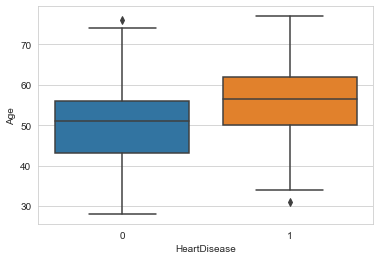

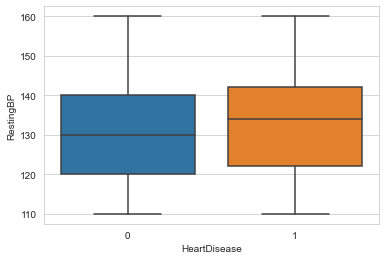

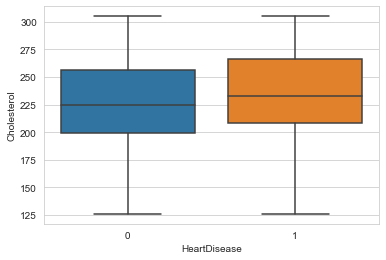

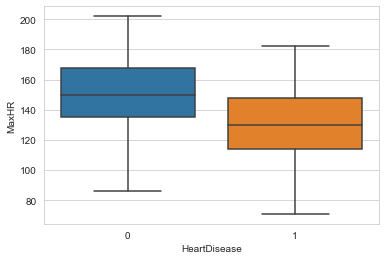

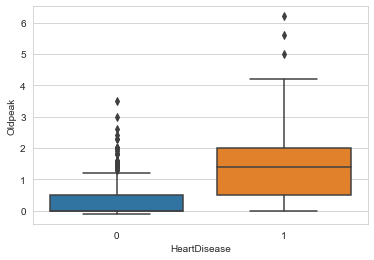

In [14]:
#create a box plot for num variables
def plot_box(df, cols, col_x = 'HeartDisease'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Age', 'RestingBP', 'Cholesterol',"MaxHR",
            'Oldpeak'
            ]
plot_box(df, num_cols)

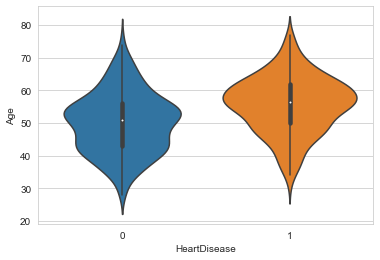

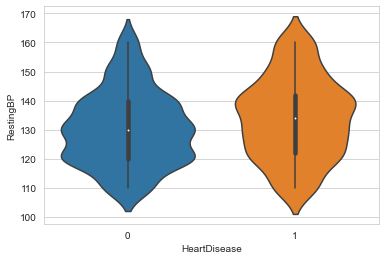

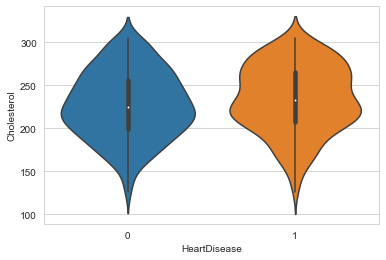

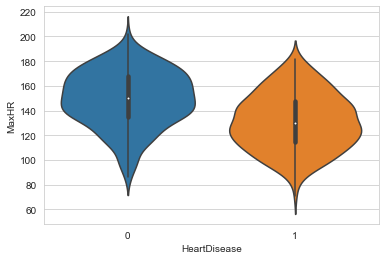

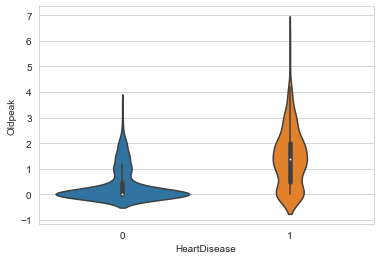

In [15]:
#VIOLIN PLOTS
def plot_violin(df, cols, col_x = 'HeartDisease'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, num_cols)

SPLIT

In [7]:
target = "HeartDisease"
X = df.drop(columns=target)
y = df[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

BASELINE

In [8]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:",round(acc_baseline,2))

Baseline Accuracy: 0.53


ITERATE

In [9]:
#build a model
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42)
)
#fit the model
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Sex', 'ChestPainType', 'RestingECG',
                                      'ExerciseAngina', 'ST_Slope'],
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                         {'col': 'ChestPainType',
                                          'data_type': dtype('O'),
                                          'mapping': ATA    1
ASY    2
NAP    3
TA     4
NaN   -2
dtype: int64},
                                         {'col': 'RestingECG',
                                          'data_type': dtype('O'),
                                          'mapping': Normal    1
ST        2
LVH       3
NaN      -2
dtype: int64},
                                         {'col': 'ExerciseAngina',
                                          'data_type': dtype('O'),
                  

EVALUATE THE MODEL

In [16]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_train


1.0

COMMUNICATE RESULTS

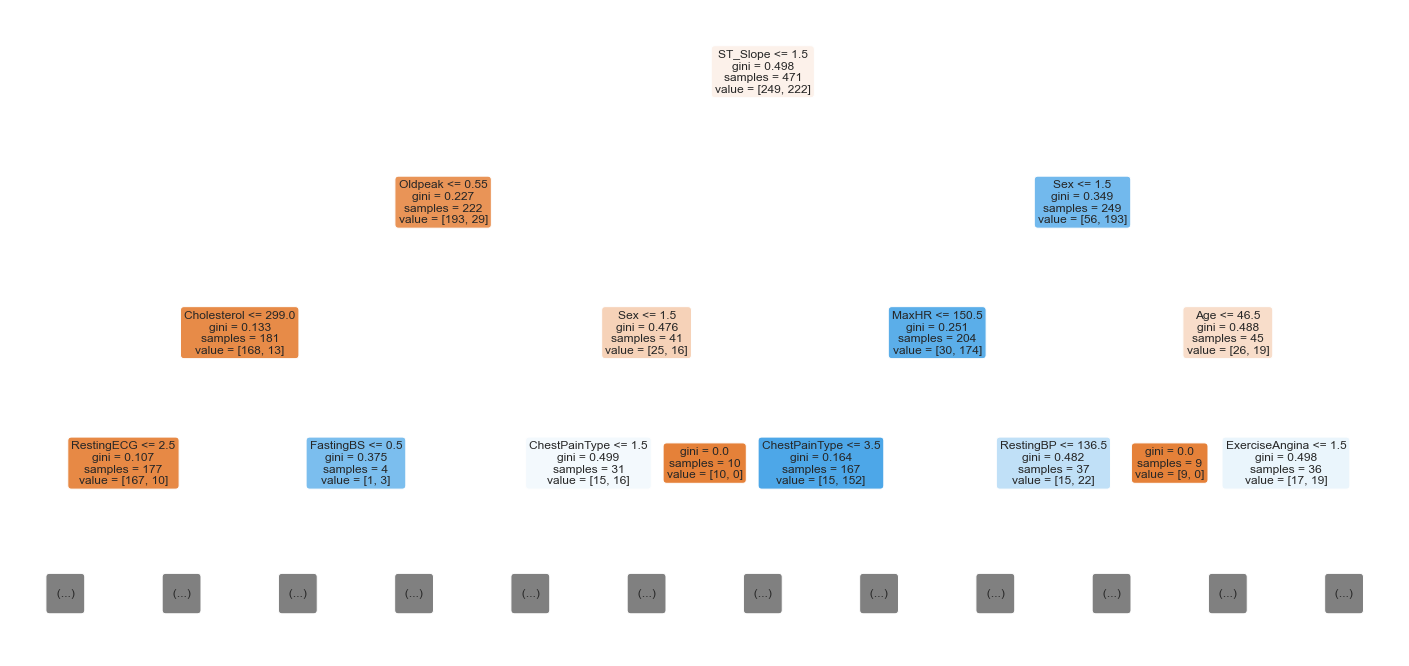

In [11]:
fid,ax = plt.subplots(figsize=(25,12))
#plot the graph
plot_tree(
        decision_tree = model.named_steps['decisiontreeclassifier'],
        feature_names = X_train.columns,
        filled = True, #color leaf with class
        rounded = True, #Display proportion of class in leafs
        max_depth = 3, #display the first 3 levels
        fontsize=12,
        ax=ax,
);

EXTRACT FEATURE IMPORTANCES

In [12]:
features = X_train.columns
importances = model.named_steps['decisiontreeclassifier'].feature_importances_
importances

array([0.05321094, 0.08566385, 0.04612983, 0.09042889, 0.08084069,
       0.00639043, 0.04930913, 0.08020356, 0.02171393, 0.07076747,
       0.41534129])